##  Izziv: Zanesljiva števila

Tale naloga je kar tako, za izziv. Če bo kdo kaj zanimivega počel in oddal, bom(o) komentiral(i). Naloga ni čisto brez matematičnega ozadja, zato predlagam, da jo rešujete brez preveč googlanja; če zgolj vpišete zaporedje v Google, boste hitro izvedeli preveč. Pa brez spoilerjev na forumu, prosim. :)

1 in 2 sta zanesljivi števili. 3 = 1 + 2, torej je tudi zanesljivo. 4 je 1 + 3, torej je zanesljivo. 5 pa ni zanesljivo število, ker je enako 1 + 4 in 2 + 3. 6 je zanesljivo, ker je enako 2 + 4 (in ga ne moremo pridobiti na noben drug način -- 3 + 3 ne šteje). 7 ni zanesljivo, ker je enako 1 + 6 in 3 + 4.

Število je torej zanesljivo, če ga lahko zapišemo na samo en način kot vsoto dveh zanesljivih števil. Seznam zanesljivih števil se tako začne z

```
1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, ...
```

Izziv: čim hitreje naračunaj vsa zanesljiva števila, manjša od 100 000. V Pythonu. Uporabi, kar hočeš, tudi stvari, ki se jih še nismo učili.

Če boste naložili kakšno rešitev, kliknite "Oddaj", da bom(o) obveščen(i) o tem in bom(o) pogledal(i), kaj ste počeli.

## Rešitev

Najprej recimo bobu bob in Ulamovim številom [Ulamova števila](https://en.wikipedia.org/wiki/Ulam_number).


### Seznami in dve zanki znotraj zanke

In [ ]:
ulam = [1, 2]

for n in range(3, 5000):
    nacinov = 0
    for st1 in ulam:
        for st2 in ulam:
            if st2 >= st1:
                break
            elif st1 + st2 == n:
                nacinov += 1
                break
    if nacinov == 1:
        ulam.append(n)

print(ulam)

V začetku imamo Ulamovi števili 1 in 2. Nato preskušamo vsa števila od 3 do 999 (`for i in range(3, 1000)`). Za vsako bomo preverili, na koliko načinov ga lahko sestavimo. V začetku postavimo `nacinov = 0` in potem gremo prek vseh parov -- `for st1 in ulam` in znotraj tega `for st2 in ulam`. No, ne prek čisto vseh parov. Da bo hitrejše, bomo zahtevali, naj bo drugo število manjše od prvega; če je `st2 >= st1`, bomo z `break` prekinili notranjo zanko. Vsakič, ko opazimo, da se števili seštejeta v `n`, povečamo števec načinov, na katere dobimo `n` -- `nacinov += 1`. Ko je vse prešteto, preverimo, ali smo število dobili le na en način in v tem primeru ga dodamo med Ulamova števila.

Tole je bila najpogostejša rešitev - vsaj konceptualno. Namesto zank `for` so mnogi pisali `while` in potem uporabljali indekse. Tudi prav, `for`-a se dotlej niti nismo učili.

Čemu služi drugi `break`? Ni potreben, le program pospeši. Ko enkrat vidimo, da smo našli število `st2`, ki se s `st1` sešteje v `n`, nima smisla, da iščemo, ali obstaja še kakšno. Števila v seznamu se ne ponavljajo, torej smemo notranjo zanko mirno prekiniti.

Potem pa se domislimo, da nas niti ne zanima, na koliko načinov lahko dobimo posamezno število; če ga lahko dobimo na dva načina, nam je vseeno, ali jih bo na koncu pet ali dvanajst - ali pa bo morda ostalo pri dveh. Zato lahko tudi zunanjo zanko prekinemo, čim `nacinov` doseže 2.

In [2]:
for n in range(3, 1000):
    nacinov = 0
    for st1 in ulam:
        for st2 in ulam:
            if st2 >= st1:
                break
            elif st1 + st2 == n:
                nacinov += 1
                break
        if nacinov == 2:
            break
    if nacinov == 1:
        ulam.append(n)
        
print(ulam)

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690, 695, 720, 722, 732, 734, 739, 751, 781, 783, 798, 800, 820, 847, 849, 861, 864, 866, 891, 893, 905, 927, 949, 983, 986, 991, 3, 6, 11, 16, 26, 36, 48, 53, 72, 77, 82, 87, 97, 102, 114, 126, 131, 148, 175, 180, 197, 209, 219, 236, 241, 253, 258, 273, 319, 324, 339, 356, 363, 390, 400, 412, 429, 434, 451, 456, 483, 522, 544, 566, 605, 627, 688, 720, 732, 781, 798, 820, 847, 864, 891, 986, 991]


Pomembno je, da se pogoj `if nacinov == 2` nahaja v zunanji zanki `for` in ne notranji. `break` namreč prekine le najbolj notranjo zanko, v kateri se nahaja. V Pythonu ni načina, da bi na najbolj notranje nivoju (znotraj zanke `for st2 in ulam`) prekinili tudi zunanjo zanko (`for st1 in ulam`).

Seveda se lahko kdo pritožuje, da je to neroden jezik. Je, to je neroden jezik za pisanje nerodnih programov. :) Poskusimo sprogramirati boljše. In hitrejše.

Predtem pa morda poračunajmo, kako počasen je ta program. Tule sem najprej v resnici računal, a potem razmislil, da se boste morda ustrašili, zato naj bo le intuitivno: če imamo zanko, ki se obrne N-krat, znotraj te eno zanko, katere število korakov je sorazmerno številu korakov zunanje zanke, in znotraj te še eno tako, se bo vse skupaj odvrtelo $N\times N\times N$-krat. Čas izvajanja programa bo torej sorazmeren kubu, $N^3$.

To nam pove, kaj moramo storiti: znebiti se moramo notranje zanke.

### Množica in ena zanka znotraj zanke

Kaj počne najbolj notranja zanka? Preverja, ali je v seznamu takšno število `st2`, da bo vsota `st1 + st2` enaka `n`. Obrnimo: zanima nas, ali seznam `ulam` vsebuje število `n - st1`.

Če vemo kaj o seznamih (če še ne, pa bomo še izvedeli), vemo, da obstaja preprost način, da preverimo, ali le-ta vsebuje neko število.

In [3]:
ulam = [1, 2]

for n in range(3, 1000):
    nacinov = 0
    for st1 in ulam:
        if st1 >= n / 2:
            break
        if n - st1 in ulam:
            nacinov += 1
            if nacinov == 2:
                break
    if nacinov == 1:
        ulam.append(n)
        
print(ulam)

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690, 695, 720, 722, 732, 734, 739, 751, 781, 783, 798, 800, 820, 847, 849, 861, 864, 866, 891, 893, 905, 927, 949, 983, 986, 991]


Prvi pogoj iz prejšnjega programa, `if st2 >= st1` se je zdaj spremenil v `if st1 >= n / 2`: če je `st1` večji od `n / 2`, bo `st2` manjši - česar pa ne pustimo. Če bi hoteli celoštevilsko deljenje, bi pisali `if st1 >= (n + 1) // 2`, saj `// 2` zaokroža navzdol.

Nato z `if n - st1 in ulam` preverimo, ali je med Ulamovimi števili takšno, ki se bo seštelo v `n`.

Notranje zanke smo se res znebili, a le navidez. Ko Python preverja pogoj `n - st1 in ulam`, mora iti prek seznama števil ... natančno tako, kot smo počeli v zanki. Zanka torej ostaja, le skrila se je v operator `in`. Program bo sicer hitrejši, saj to, skrito zanko izvede Python, ki je napisan v jeziku C, ki je bistveno hitrejši od Pythona. A hitrost izvajanja še vedno narašča s kubom števila števil.

A če hočemo res pospešiti program, bomo namesto seznama uporabili množico.

In [4]:
ulam = {1, 2}

for n in range(3, 10000):
    nacinov = 0
    for st1 in ulam:
        if st1 < n / 2 and n - st1 in ulam:
            nacinov += 1
            if nacinov == 2:
                break
    if nacinov == 1:
        ulam.add(n)
        
print(sorted(ulam)[:100])

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690]


Spremembe so skoraj kozmetične. Oglate oklepaje so zamenjali zaviti (namesto `[1, 2]` pišemo `{1, 2}`); namesto `ulam.append(n)` imamo `ulam.add(n)`, ker se v množicah piše tako; in namesto `print(ulam)` imamo `print(sorted(ulam))`, ker bodo elementi množice sicer izpisani pomešano. Izpisali pa smo le prvih 100 - da ni preveč.

Razlika v hitrosti izvajanja pa je drastična. Kot se bomo učili, Python zdaj v `n - st1 in ulam` ne išče več po množici `ulam`, temveč kar v trenutku ve, ali je iskano število v množici ali ne.

Namesto množic bi lahko tu uporabili kar seznam z 10000 elementi. Ali kaj podobnega.

Če bi opazovali čas izvajanja tega programa pri različnem številu števil, bi videli, da narašča s kvadratom, saj imamo zdaj le dve gnezdeni zanki. 


### Slovarji in vsote vnaprej

Vsakič, ko bomo odkrili novo Ulamovo število, bomo izračunali vsote tega števila z vsemi že prej znanimi Ulamovimi števili. In šteli, kolikokrat se pojavi katera vsota. `stevec_vsot[100]`, recimo, bo povedal, na koliko načinov se da dobiti vsoto 100.

In [5]:
stevec_vsot = [0, 1, 1] + [0] * 999998
ulam = [1]

for n in range(2, 100001):
    if stevec_vsot[n] == 1:
        for e in ulam:
            if n + e > 1000000:
                break
            stevec_vsot[n + e] += 1
        ulam.append(n)
print(ulam[:100])

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690]


V začetku vemo, da ne moremo dobiti 0. 1 in 2 dobimo na 1 način. Vsa ostala števila pa, zaenkrat, na 0 načinov. Nato preskušamo števila od 2 naprej. Če je to število možno dobiti na en sam način, izračunamo vsote z vsemi znanimi Ulamovimi števili, in če so te vsote manjše od 100000 (če niso, reč takoj prekinemo), povečamo števec vsot. Nato še dodamo to število med Ulamova.

Kot ste opazili, zdaj računamo števila do 100.000. Ker lahko.

Še nekoliko hitrejše je tole.

In [6]:
from collections import defaultdict

pojavitve = defaultdict(int)
pojavitve.update({1: 1, 2: 1})
ulam = [1]

for n in range(2, 100001):
    if pojavitve.pop(n, 0) == 1:
        for e in ulam:
            vsota = e + n
            if vsota > 100000:
                break
            pojavitve[vsota] += 1
        ulam.append(n)

print(ulam[:100])

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690]


Komentiral ne bom preveč. Uporablja defaultdict, ki ga bomo sicer enkrat omenili na predavanjih, vendar bi delovalo enako dobro tudi z običajnim slovarjem. Priznati moram še, da sem `if vsota > 100000: break` ukradel enemu od študentov; meni se to ni zdelo tako zelo pomembno, a seveda je.

Kar nekaj študentov je oddalo zelo dobre rešitve, zato raje ne bi našteval imen, da ne bom koga izpustil. Zelo prav pa je, da povem, da je eden od študentov naredil tole odlično rešitev, ki je za tretjino hitrejša od moje. (V resnici je napisal malo drugače, a ideja je ista.)

In [7]:
pojavitve = {1: True, 2: True}
ulam = [1]

for n in range(2, 100001):
    if pojavitve.get(n, False):
        for e in ulam:
            vsota = e + n
            if vsota > 100000:
                break
            if vsota in pojavitve:
                pojavitve[vsota] = False
            else:
                pojavitve[vsota] = True
        ulam.append(n)

print(ulam[:100])

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690]


Njegova rešitev je podobna moji, le da ne šteje pojavitev temveč v slovar zabeleži `True`, ko vsoto vidi prvič, nato pa `False`. Nenavadno je, da je to toliko hitrejše, saj privarčuje le eno seštevanje in eno primerjavo.

### C-jevski kazalci

Posebne omembe je vreden tale program enega od študentov iz generacije 19/20.

In [9]:
nums = [1, 2]

def findMatches(x):
    match = 0 #najdenih parov
    l = 0 #levi index
    r = len(nums)-1 #desni index
    #iteriraj skozi tabelo, ko se 2 števili seštejeta v željeno vrednost, in če povečamo levo število, je vsota kvečjem večja, torej zmanjšamo desno
    #če pomanjšamo desno lahko dobimo željeno število kvečjem da povečamo levo 
    while l < r:
        #par najden, nadaljuj z manjšim inkrementom ne večjim kot, če bi premaknili desni index
        if nums[l] + nums[r] == x: 
            match += 1
            l += 1
        elif nums[l] + nums[r] < x:
            l += 1
        else:
            r -= 1
        #čim je najden dodaten par je brezveze iskati dalje
        if match > 1:
            break

    return match

for i in range(100000):
    if findMatches(i) == 1:
        nums.append(i)

print(nums[:100])

[1, 2, 3, 4, 6, 8, 11, 13, 16, 18, 26, 28, 36, 38, 47, 48, 53, 57, 62, 69, 72, 77, 82, 87, 97, 99, 102, 106, 114, 126, 131, 138, 145, 148, 155, 175, 177, 180, 182, 189, 197, 206, 209, 219, 221, 236, 238, 241, 243, 253, 258, 260, 273, 282, 309, 316, 319, 324, 339, 341, 356, 358, 363, 370, 382, 390, 400, 402, 409, 412, 414, 429, 431, 434, 441, 451, 456, 483, 485, 497, 502, 522, 524, 544, 546, 566, 568, 585, 602, 605, 607, 612, 624, 627, 646, 668, 673, 685, 688, 690]


Kudos. Sploh, če povem še, da je dotični napisal to rešitev med predavanji, na telefon. :)

Ta rešitev sicer ni najhitrejša v Pythonu (vseeno pa je kar hitra!), saj ne uporablja hitrih podatkovnih struktur (množic, slovarjev), ki so vgrajeni vanj. Pač pa bi bila to zelo dobra rešitev v C-ju. Takole, recimo, bi to izgledalo v C++.

```cpp
#include <iostream>
#include <vector>

int main() {
    std::vector<int> ulam{1, 2};
    ulam.push_back(1);
    ulam.push_back(2);
    for(auto x = 0; x < 100000; x++) {
        auto down = ulam.begin();
        auto up = ulam.end();
        up--;
        int matches = 1;
        while (up != down) {
            if ((*up + *down == x) && (++matches == 2))
                break;
            if (*up + *down < x)
                down++;
            else
                up--;
        }
        if (matches == 1)
            ulam.push_back(x);
    }

    for(auto it = ulam.begin(); it != ulam.end(); it++)
        std::cout << *it << ' ';
}
```

### Numpy: Python s (skoraj) hitrostjo C-ja

`numpy` je knjižnica za Python, ki zna delati s poljubno dimenzionalnimi tabelami poljubnih tipov. Zanke izvaja v C-ju, zato so hitre, kolikor le morejo biti. Konkretno, z njim je mogoče narediti tole:

In [11]:
# navadno ga uvozimo tako z `import numpy as np`, da lahko potem pišemo kar `np` namesto `numpy`
import numpy as np  

a = np.array([2, 3, 5, 7])
b = np.array([5, 1, 2, 8])
print(a + b)

[ 7  4  7 15]


Ta program sešteje obe tabeli po elementih, zato je rezultat `[7, 4, 7, 15]`. In to je tudi vse, kar potrebujemo za rešitev te naloge.

Spodnji program se izvede v desetinki ali dveh, odvisno od hitrosti računalnika.

In [12]:
import numpy as np

pojavitve = np.zeros(100001, dtype=np.int)
pojavitve[1:3] = 1

for n in range(2, 100001):
    if pojavitve[n] == 1:
        up = min(2 * n, 100000)
        pojavitve[n:up] += pojavitve[:up - n]
    else:
        pojavitve[n] = 0

ulam = np.flatnonzero(pojavitve)
print(ulam[:100])

[  1   2   3   4   6   8  11  13  16  18  26  28  36  38  47  48  53  57
  62  69  72  77  82  87  97  99 102 106 114 126 131 138 145 148 155 175
 177 180 182 189 197 206 209 219 221 236 238 241 243 253 258 260 273 282
 309 316 319 324 339 341 356 358 363 370 382 390 400 402 409 412 414 429
 431 434 441 451 456 483 485 497 502 522 524 544 546 566 568 585 602 605
 607 612 624 627 646 668 673 685 688 690]


Ideja je praktično enaka kot v onem od gornjih programov, ki je vzdrževal tabelo, na koliko načinov je mogoče sestaviti posamično število (`pojavitve[n]` predstavlja število načinov, na katerega lahko dobimo število `n`) in je ob vsakem novem zanesljivem številu le-tega prištel k vsem doslej znanim zanesljivim številom in povečal ustrezni element tabele. Bistvena razlika je, da se notranja zanka zgodi v numpy-ju. 

Tabela `pojavitve` v bistvu vsebuje dve različni stvari. Vzemimo nek `n`, recimo 13. V elementih od 0 do 12, tabela `pojavitve[e]` vsebuje `1`, če je število `e` Ulamovo in `0`, če ni. V elementih od 14 naprej pa tabela vsebuje število različnih vsot, na katere lahko pridelamo `i`.

Ko pridemo do števila 13, je začetek tabele videti tako:

```
#0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
```

Pred trinajstim elementom so enice na indeksih 1, 2, 3, 4, 6, 8, 11 -- to so zanesljiva števila. Enica je tudi pri 13, saj lahko 13 naračunamo na en zam način (2 + 11, a to ni pomembno, niti se iz tabele ne vidi). Ostane tabele pove, na koliko načinov lahko naračunamo posamično število. 14 lahko naračunamo na dva načina (3 + 11 in 6 + 8), 15 na enega (4 + 11), 16 pa ne moremo.

Zdaj, v tem trenutku, ugotovimo, da je 13 zanesljivo število. Torej je potrebno povečati število načinov, na katere lahko naračunamo 13 + 1, 13 + 2, 13 + 3, 13 + 4, 13 + 6, 13 + 8 ... Z drugimi besedami: povečati je potrebno elemente, ki se nahajajo na indeksu `13 + e`, če je element `pojavitve[e]` enak 1. S tretjimi besedami, sešteti je potrebno tole

```
# 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
[ 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
+                                       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0]
=[0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 3, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0]
```

Po tem, ko dodamo 13, lahko 14 dobimo na tri načine (pridružil se je še 13 + 1), 15 na 2 (dodamo 13 + 2), 16 na enega (13 + 3), 17 na 2 (13 + 4), 18 pa še vedno ne moremo dobiti, saj je `pojavitve[5]` enak 0 (5 ni zanesljivo število).

V drugi vrstici je samo za 13 (se pravi: za `n`) elementov zamaknjena prva vrstica. To naredimo približno z

```
pojavitve[n:] += pojavitve
```

K vsem elementom od n-tega naprej prištej, kar je v `pojavitve`.

To ne bi delovalo, ker tabeli, ki ju seštevamo (po elementih) nista enako dolgi. Zato bi morali napisati

```
pojavitve[n:] += pojavitve[:-n]
```

To pomeni, k tabeli, ki se začne pri n-tem elementu, prištej vsebino taiste tabele brez zadnjih n-elementov (a od začetka, seveda).

Vendar so v tabeli večinoma ničle. Največje število, ki bi utegnilo še biti v tabeli, je `2 * n`. Torej bi lahko pisali `pojavitve[n: 2 * n]`. Vendar je `2 * n` lahko več od 100000. Zato `up = min(2 * i, 100000)` in prištevamo k `pojavitve[n:up]`.

To storimo le, če je `n` zanesljivo število. Če ni, pa je `pojavitve[n]` bodisi 0 (vsote ni mogoče dobiti) ali več kot 1 (dobimo jo lahko na več kot 1 način). V obej primerih nastavimo `pojavitve[n]` na 0, da označimo, da `n` ni zanesljivo število, tako da v naslednjih korakih ne bo prispevalo k število možnih vsot.

Program je tako hiter, ker se seštevanje tabel (ki smo ga v tistem od prejšnjih programov, ki je že uporabljal to strategijo "seštevanja naprej", izvedli z gnezdeno zanko `for`) dogaja v C-ju. Na mojem, kar starem in počasnem prenosniku potrebuje ta program dve desetinki sekunde. Ekvivalenten program v C-ju potrebuje eno desetinko. Vseeno je to kar odlično.

Zanimivo je, kaj se zgodi, če poskusimo desetkrat več števil, torej števila do milijon. Namesto dveh desetink sekunde potrebuje dvajset sekund. To je popolnoma pravilno: še vedno imamo dve gnezdeni zanki (čeprav je ena v Pythonu, ena v C-ju), torej bo za desetkrat večji problem potreboval stokrat več časa.

### Matematiki

Če hočemo biti še hitrejši, vzamemo hitrejši jezik (Python za take reči ni ravno hiter) ali, predvsem, pogledamo, ali so matematiki odkrili kak trik, ki normalnemu človeku ne bi prišel na misel. Seveda so. [Uživajte v branju](https://pdfs.semanticscholar.org/30a6/3d149c235ca2d90d13cce7bc9d62e9629e3d.pdf).

In [1]:
%matplotlib inline

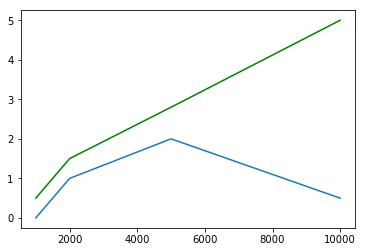

In [4]:
from matplotlib import pyplot

x = [1000, 2000, 5000, 10000]
t = [0.5, 1.5, 2.8, 5.0]
t2 = [0, 1, 2, 0.5]
pyplot.plot(x, t, color="green")
pyplot.plot(x, t2)